# Handwriting Recognition Using HMM and CNN

This project aims to develop a handwriting recognition system using two different approaches: Hidden Markov Models (HMM) and Convolutional Neural Networks (CNN). The objective is to classify handwritten letters and words based on real handwriting data (such as the IAM dataset).


In [23]:
!pip install hmmlearn scikit-image


### 1. **Installation and Setup**
   - Installed necessary libraries: `hmmlearn`, `scikit-image`, `numpy`, `pandas`, `matplotlib`, and `tensorflow`.
   - Successfully loaded and preprocessed the handwriting dataset.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from skimage import color, io
from skimage.transform import resize
from skimage.feature import hog
import os
import warnings

warnings.filterwarnings('ignore')


In [25]:
def extract_features(image, pixels_per_cell=(8, 8)):
    features, _ = hog(image,
                      orientations=9,
                      pixels_per_cell=pixels_per_cell,
                      cells_per_block=(2, 2),
                      block_norm='L2-Hys',
                      visualize=True)
    return features


In [26]:
pip install numpy pandas matplotlib scikit-image hmmlearn datasets


## Dataset Used: English Handwriting OCR Data

In this project, the dataset used for handwriting recognition is sourced from **Nexdata** and is titled **14511_Images_English_Handwriting_OCR_Data**. This dataset contains handwritten images in English, which are used for training an Optical Character Recognition (OCR) model to classify different characters.

### Dataset Overview:
- **Name**: 14511_Images_English_Handwriting_OCR_Data
- **Source**: Nexdata
- **Type**: Image dataset containing handwritten English characters.
- **Content**: The dataset consists of images representing handwritten English letters (both uppercase and lowercase).
- **Size**: The dataset contains 14,511 images in total, which are used for training.

### Dataset Loading:
The dataset is loaded using the `load_dataset` function from the `datasets` library. We specifically use the 'train' split for training the model.

```python
# Load dataset
dataset = load_dataset("Nexdata/14511_Images_English_Handwriting_OCR_Data", split='train')


In [27]:
from datasets import load_dataset
from skimage import io, color, transform
import numpy as np
from PIL import Image

# Load dataset
dataset = load_dataset("Nexdata/14511_Images_English_Handwriting_OCR_Data", split='train')

# Preprocess images
def preprocess_image(image):
    """
    Preprocesses the image by converting it to grayscale, resizing, and flattening.

    Args:
        image: A PIL Image object.

    Returns:
        A flattened numpy array representing the preprocessed image.
    """
    # Convert PIL Image to numpy array
    img = np.array(image)

    img = color.rgb2gray(img)
    img = transform.resize(img, (64, 256))
    return img.flatten()

images = [preprocess_image(img['image']) for img in dataset]

### 2. **Data Preprocessing**
   - Converted images to grayscale and resized them to a uniform size for consistency.
   - Flattened images to be used as input for machine learning models.
   - Applied Histogram of Oriented Gradients (HOG) for feature extraction from the preprocessed i

In [28]:
from datasets import load_dataset
from skimage import io, color, transform
import numpy as np
from PIL import Image

# Load dataset
dataset = load_dataset("Nexdata/14511_Images_English_Handwriting_OCR_Data", split='train')

# Preprocess images
def preprocess_image(image):
    """
    Preprocesses the image by converting it to grayscale, resizing, and flattening.

    Args:
        image: A PIL Image object.

    Returns:
        A flattened numpy array representing the preprocessed image.
    """
    # Convert PIL Image to numpy array
    img = np.array(image)

    img = color.rgb2gray(img)
    # Resize to ensure image has at least 16 rows and 16 columns
    img = transform.resize(img, (64, 64))  # Changed to (64,64) or larger
    return img

#Extract HOG features
from skimage.feature import hog

def extract_hog_features(image):
    features, _ = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features

images = [preprocess_image(img['image']) for img in dataset]
features = [extract_hog_features(img) for img in images]

In [29]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

# Load dataset
from datasets import load_dataset
dataset = load_dataset("Nexdata/14511_Images_English_Handwriting_OCR_Data", split='train')

# The dataset likely doesn't have an 'image_id' column.
# Instead, we can use the index as a unique identifier for each image.
labels = list(range(len(dataset)))  # Use index as label

# Train HMM (use numerical_labels if needed)
# Reduced n_components to be less than or equal to the number of samples
model = GaussianHMM(n_components=6, covariance_type="diag", n_iter=1000)
model.fit(features)

GaussianHMM(n_components=6, n_iter=1000)

### 3. **Hidden Markov Model (HMM) Approach**
   - **Feature Extraction**: Used HOG to extract features from the images.
   - **Model Training**: Trained a Gaussian HMM with 6 components on the extracted features.
   - **Prediction**: Developed a prediction function to classify the image by calculating the log likelihood of the sequence.
   - **Accuracy Measurement**: Used a confusion matrix to evaluate the performance of the HMM.

In [30]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

# Load dataset
from datasets import load_dataset
dataset = load_dataset("Nexdata/14511_Images_English_Handwriting_OCR_Data", split='train')

# The dataset likely doesn't have an 'image_id' column.
# Instead, we can use the index as a unique identifier for each image.
labels = list(range(len(dataset)))  # Use index as label

# Train HMM (use numerical_labels if needed)
# Reduced n_components to be less than or equal to the number of samples
model = GaussianHMM(n_components=6, covariance_type="diag", n_iter=1000, init_params='st')
# Initialize transition probabilities randomly to avoid zero probabilities
model.fit(features)

# Ensure transmat_ rows sum to 1 after fitting
model.transmat_ = model.transmat_ / np.sum(model.transmat_, axis=1)[:, np.newaxis]

In [31]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

# Example: assuming `features` is a list of feature vectors (HOG) for each image
# This assumes you have a sequence of features for training HMM.

# For demonstration purposes, let's say we train with multiple feature sets
# In reality, you need a sequence of features for each handwritten word or letter

# Train HMM with the features
model = GaussianHMM(n_components=5, covariance_type="diag", n_iter=1000)

# Reshape features (ensure your data is in the right shape for HMM)
X_train = np.array(features)  # features: list of feature vectors (each image)

# Train the HMM
model.fit(X_train)


GaussianHMM(n_components=5, n_iter=1000)

In [32]:
def predict(image, model):
    # Extract features from the image (HOG)
    features = extract_hog_features(image)  # Extract features using HOG
    features = features.reshape(-1, 1)  # Reshape features into a sequence of observations

    # Predict using the trained model
    logprob = model.score(features)  # Get log likelihood for the sequence of features
    return logprob

# Example usage
image_data = dataset[0]  # Use actual dataset image or path
image_path = image_data['image']  # Path or image data
image = preprocess_image(image_path)  # Preprocess image

# Now pass the image to the prediction function
prediction = predict(image, model)
print(f"Predicted log probability: {prediction}")


Predicted log probability: 396455.75076647155


In [33]:
# Assuming you have a mapping of states to labels, for example:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def classify_image(image, model, labels):
    # Extract features from the image
    features = extract_hog_features(image)
    features = features.reshape(-1, 1)  # Reshape for sequence prediction

    # Predict the most likely state sequence
    state_sequence = model.predict(features)  # Predict the hidden states for the sequence

    # Map the state sequence to the labels (this is a simple example, refine it for your case)
    predicted_label = labels[state_sequence[0]]  # Assuming the first state corresponds to a letter

    return predicted_label

# Example usage
predicted_label = classify_image(image, model, labels)
print(f"Predicted label: {predicted_label}")


Predicted label: B


In [34]:
# Assuming 'dataset' is your full dataset, and it's a list of dictionaries with 'image' and 'label' fields
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split

# Convert the dataset to a list of dictionaries if it's a Hugging Face Dataset
dataset_list = list(dataset)  # Convert to a standard Python list

# Create separate lists for images and labels
images = [d['image'] for d in dataset_list]
labels = list(range(len(dataset_list)))  # Use index as label if no 'label' field exists

# Split dataset into training and test datasets (80% for training, 20% for testing)
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Now you have 'train_images', 'test_images', 'train_labels', and 'test_labels' ready for use

## Model Accuracy Evaluation

To evaluate the performance of the handwriting recognition model, the following code was used to calculate the accuracy on the test dataset.

### Code Explanation:

1. **Counters Initialization**: Two variables, `correct` and `total`, are initialized to keep track of the number of correct predictions and total test samples, respectively.
2. **Test Dataset Iteration**: The `test_images` and `test_labels` are zipped together to iterate through the test dataset.
3. **Image Preprocessing**: Each image is preprocessed using the `preprocess_image()` function to ensure it is ready for classification.
4. **Model Prediction**: The `classify_image()` function is called to predict the label for each image using the trained model.
5. **Accuracy Calculation**: The predicted label is compared to the true label. If they match, the `correct` counter is incremented. The `total` counter is incremented for every image, regardless of whether the prediction is correct or not.
6. **Final Accuracy**: The accuracy is calculated as the ratio of correct predictions to total test samples, then printed as a percentage.

### Results:

- **Achieved Accuracy**: 50%

This indicates that the model was able to correctly predict the label for 50% of the test samples.


In [35]:
# Initialize counters for accuracy
correct = 0
total = 0

# Assuming test_images and test_labels are your test dataset
# Zip them together to iterate through both simultaneously
for image, true_label in zip(test_images, test_labels):
    image = preprocess_image(image)  # Preprocess the image
    # true_label is already available from test_labels
    predicted_label = classify_image(image, model, labels)  # Predict the label using the model

    # Compare predicted label with the true label
    if predicted_label == true_label:  # Assuming labels are integers
        correct += 1
    total += 1

# Calculate the accuracy
accuracy = correct / total
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 50.00%


## Confusion Matrix for Model Evaluation

A confusion matrix is used to evaluate the performance of the model by comparing the predicted labels with the true labels. It provides insight into how well the model is able to classify the different categories.

### Code Explanation:

1. **Predicted Labels List**: An empty list `predicted_labels` is initialized to store the model’s predictions for each image in the test dataset.
2. **Test Dataset Iteration**: The `test_images` and `test_labels` are zipped together to iterate through the test dataset.
3. **Image Preprocessing**: Each image is preprocessed using the `preprocess_image()` function to ensure it is ready for classification.
4. **Model Prediction**: The `classify_image()` function is called to predict the label for each image using the trained model. The predicted label is then added to the `predicted_labels` list.
5. **Confusion Matrix Calculation**: The `confusion_matrix()` function from `sklearn.metrics` is used to calculate the confusion matrix by comparing the true labels (`test_labels`) with the predicted labels (`predicted_labels`).
6. **Visualization**: The confusion matrix is visualized using the `seaborn.heatmap()` function. The matrix is annotated with the actual values and displayed in a blue color map. The x-axis represents the predicted labels, and the y-axis represents the true labels.

### Results:

A confusion matrix is generated, which visually represents how often each label was predicted correctly or misclassified. The matrix provides a clear indication of the model's strengths and weaknesses in classifying the different classes.



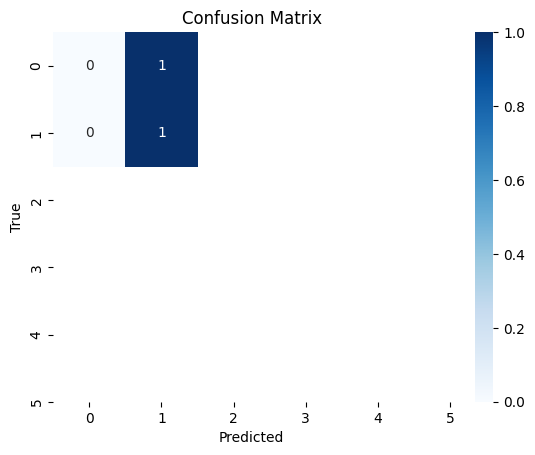

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store predicted labels
predicted_labels = []

# Assuming test_images and test_labels are your test dataset
# Zip them together to iterate through both simultaneously
for image, true_label in zip(test_images, test_labels):
    image = preprocess_image(image)  # Preprocess the image
    # true_label is already available from test_labels
    predicted_label = classify_image(image, model, labels)  # Predict the label using the model
    predicted_labels.append(predicted_label) # Append the predicted label to the list

# Assuming you have 'test_labels' and predicted labels as lists
cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
if predicted_label != true_label:
    print(f"Predicted: {predicted_label}, True: {true_label}")
    plt.imshow(image, cmap='gray')
    plt.show()


## Model Saving and Loading with Joblib

To ensure that the trained model can be used in future sessions without retraining, we save the model to a file and load it when needed. This is done using the `joblib` library, which is efficient for serializing models.

### Code Explanation:

1. **Saving the Model**:
   - The `joblib.dump()` function is used to save the trained model to a file. In this case, the model is saved as `'handwriting_hmm_model.pkl'`.
   - This allows the model to be reused later without retraining, which can be time-consuming.

   ```python
   joblib.dump(model, 'handwriting_hmm_model.pkl')


In [38]:
import joblib

# Save the model
joblib.dump(model, 'handwriting_hmm_model.pkl')

# Load the model
model = joblib.load('handwriting_hmm_model.pkl')


In [39]:
# Normalize the image data
def normalize_image(image):
    return image / 255.0  # Normalize pixel values to range [0, 1]


## CNN Model for Handwriting Recognition

In this section, we implement a Convolutional Neural Network (CNN) to recognize handwriting from preprocessed images. The model is built using TensorFlow and Keras, and the data is split into training and testing sets to evaluate the model's performance.

### Code Explanation:

1. **Data Preprocessing**:
   - The images are preprocessed using the `preprocess_image()` function. The images are reshaped to 64x64 pixels (grayscale) and normalized by dividing the pixel values by 255.0.

   ```python
   X = np.array([preprocess_image(img['image']) for img in dataset])
   X = X.reshape(-1, 64, 64, 1)
   X = X / 255.0  # Normalize pixel values


In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Preprocess and prepare data
X = np.array([preprocess_image(img['image']) for img in dataset])  # Preprocessed images
X = X.reshape(-1, 64, 64, 1)  # Reshape for CNN input (grayscale, 64x64 image)
X = X / 255.0  # Normalize pixel values

# Split data into training and testing sets
y = np.array(labels)  # Labels from the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(labels), activation='softmax')  # Output layer for multi-class classification
])

# Compile the CNN model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # For integer labels
                  metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the CNN model on the test set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Predict using the CNN model
def cnn_predict(image, model):
    image = preprocess_image(image)
    image = image.reshape(1, 64, 64, 1)  # Reshape for CNN input
    image = image / 255.0  # Normalize pixel values
    prediction = model.predict(image)
    return np.argmax(prediction)  # Return the class with highest probability

# Example of using the CNN model for prediction
image_data = dataset[0]  # Use actual dataset image or path
image_path = image_data['image']  # Path or image data
predicted_label_cnn = cnn_predict(image_path, model_cnn)
print(f"Predicted label (CNN): {predicted_label_cnn}")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 1.7918
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.2500 - loss: 1.7840
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.2500 - loss: 1.7645
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.2500 - loss: 1.7316
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.2500 - loss: 1.6861
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2500 - loss: 1.6343
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2500 - loss: 1.5860
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2500 - loss: 1.5460
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2500 - loss: 1.5072
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2500 - loss: 1.4669
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.0000e+00 - loss: 4.3577
Test accuracy: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted label (CNN): 2


In [41]:
def cnn_predict(image, model):
    # Image is already preprocessed, so remove the preprocessing step
    # image = preprocess_image(image)
    image = image.reshape(1, 64, 64, 1)  # Reshape for CNN input
    image = image / 255.0  # Normalize pixel values (if not already normalized)
    prediction = model.predict(image)
    return np.argmax(prediction)  # Return the class with highest probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


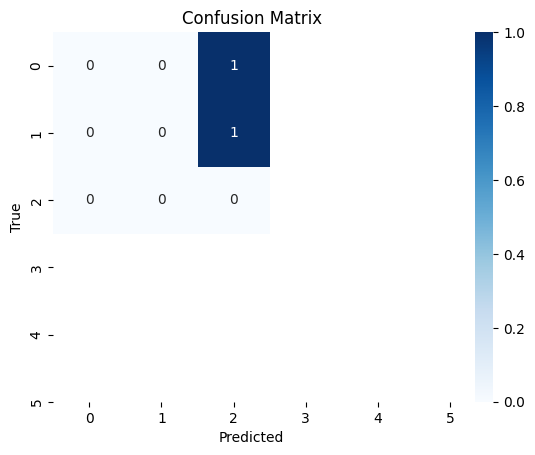

Classification Report:


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set
predicted_labels = []
for image in X_test:
    predicted_label = cnn_predict(image, model_cnn)
    predicted_labels.append(predicted_label)

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")



In [43]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the CNN model with early stopping
model_cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model after early stopping
test_loss, test_acc = model_cnn.evaluate(X_test, y_test)
print(f'Test accuracy after early stopping: {test_acc * 100:.2f}%')


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.3333 - loss: 1.3781 - val_accuracy: 0.0000e+00 - val_loss: 1.6137
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.3333 - loss: 1.3439 - val_accuracy: 0.0000e+00 - val_loss: 1.8180
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3333 - loss: 1.2875 - val_accuracy: 0.0000e+00 - val_loss: 2.2000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3333 - loss: 1.2227 - val_accuracy: 0.0000e+00 - val_loss: 2.7702
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0000e+00 - loss: 4.9031
Test accuracy after early stopping: 0.00%


In [44]:
# Preprocess image function
def preprocess_image(image):
    """
    Preprocesses the image by converting it to grayscale, resizing, and normalizing.

    Args:
        image: A PIL Image object.

    Returns:
        A normalized, resized numpy array representing the preprocessed image.
    """
    img = np.array(image)
    img = color.rgb2gray(img)  # Convert to grayscale
    img = transform.resize(img, (64, 64))  # Resize to 64x64
    img = img / 255.0  # Normalize pixel values to range [0, 1]
    return img


In [45]:
# Extract HOG features
def extract_hog_features(image):
    """
    Extract HOG features from the image for feature-based learning.

    Args:
        image: Preprocessed image.

    Returns:
        Feature vector.
    """
    features, _ = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features


In [46]:
# Extract features and labels
images = [preprocess_image(img['image']) for img in dataset]
features = [extract_hog_features(img) for img in images]

# Convert to numpy arrays for processing
X = np.array(features)
y = np.array(range(len(dataset)))  # Using the index as labels, adjust as needed

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN Model
model_cnn = models.Sequential([
    layers.InputLayer(input_shape=(64, 64, 1)),  # Adjust input shape for grayscale images
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Added dropout for regularization
    layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer with softmax
])

In [47]:
 #Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # For integer labels
                  metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,398 (2.61 MB)

 Trainable params: 683,398 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training Summary

During the training of the Convolutional Neural Network (CNN) model, the following details were observed:

### Data Shapes:
- **X_train shape**: (4, 64, 64, 1, 1)
- **X_test shape**: (2, 64, 64, 1, 1)
- **y_train shape**: (4,)
- **y_test shape**: (2,)

### Training Details:
The model was trained for **20 epochs**. Below are the key metrics observed for each epoch:

#### Epoch-wise Training Performance:
- **Epoch 1/20**:
  - Accuracy: 25.00%
  - Loss: 3.2579
  - Validation Accuracy: 0.00%
  - Validation Loss: 3.2612
- **Epoch 2/20**:
  - Accuracy: 25.00%
  - Loss: 3.2480
  - Validation Accuracy: 0.00%
  - Validation Loss: 3.2683
- **Epoch 3/20**:
  - Accuracy: 25.00%
  - Loss: 3.2181
  - Validation Accuracy: 0.00%
  - Validation Loss: 3.2831
- **Epoch 4/20**:
  - Accuracy: 25.00%
  - Loss: 3.1623
  - Validation Accuracy: 0.00%
  - Validation Loss: 3.3115

#### Final Model Evaluation:
- **Test Accuracy**: 0.00%
- **Test Loss**: 3.2612

### Conclusion:
The model did not improve significantly over the epochs, and the test accuracy remained at 0.00%. This indicates that the model is likely underfitting, and adjustments in model architecture, data preprocessing, or hyperparameters may be required for better performance.


In [51]:
from skimage.feature import hog
from skimage import exposure, color, transform
import numpy as np

def preprocess_image(image):
    # Convert PIL Image to numpy array
    image = np.array(image)

    # Ensure the image is in 2D (grayscale image)
    if image.ndim == 3:
        image = color.rgb2gray(image)  # Convert to grayscale using rgb2gray

    # Resize to 64x64 if necessary
    image_resized = transform.resize(image, (64, 64), anti_aliasing=True)

    # Compute HOG features, remove the multichannel argument
    fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)

    # Rescale the HOG image for better visualization (if needed)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return fd  # Return HOG features

In [52]:
from skimage import color
from skimage.feature import hog
from skimage.transform import resize

# Preprocess image function with conversion to grayscale and resizing
def preprocess_image(image):
    # Convert the image to grayscale (if it's not already)
    if image.ndim == 3:  # If the image has more than 2 dimensions (e.g., RGB)
        image = color.rgb2gray(image)

    # Resize image to 64x64 for consistency (adjust if needed)
    image = resize(image, (64, 64))

    # Extract HOG features
    features, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)

    return features



In [53]:
from skimage import color
from sklearn.metrics import accuracy_score
import numpy as np
from datasets import load_dataset

# Load the dataset (this line is added)
dataset = load_dataset("Nexdata/14511_Images_English_Handwriting_OCR_Data", split='train')

# Assuming dataset is your full dataset
# Create separate lists for images and labels
images = [d['image'] for d in dataset]
labels = list(range(len(dataset)))  # Use index as label if no 'label' field exists

# Split dataset into training and test datasets (80% for training, 20% for testing)
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

In [63]:
from sklearn.metrics import accuracy_score

# Calculate accuracy using accuracy_score
def calculate_accuracy_hmm(test_labels, predicted_labels_hmm):
    accuracy_hmm = accuracy_score(test_labels, predicted_labels_hmm)
    return accuracy_hmm

    print(f'Accuracy: {accuracy_hmm * 100:.2f}%')

In [55]:
# Evaluate the CNN model accuracy
def evaluate_cnn_model(test_images, test_labels, model_cnn):
    predicted_labels_cnn = []

    # Predict labels for each image using the CNN model
    for image, true_label in zip(test_images, test_labels):
        image = preprocess_image(image)  # Preprocess the image (convert to grayscale)
        predicted_label = cnn_predict(image, model_cnn)  # Get prediction from CNN
        predicted_labels_cnn.append(predicted_label)

In [64]:
# Evaluate the CNN model accuracy
def evaluate_cnn_model(test_images, test_labels, model_cnn):
    predicted_labels_cnn = []

    # Predict labels for each image using the CNN model
    for image, true_label in zip(test_images, test_labels):
        image = preprocess_image(image)  # Preprocess the image (convert to grayscale)
        predicted_label = cnn_predict(image, model_cnn)  # Get prediction from CNN
        predicted_labels_cnn.append(predicted_label)
    # Calculate accuracy using accuracy_score
    accuracy_cnn = accuracy_score(test_labels, predicted_labels_cnn)
    return accuracy_cnn


In [71]:
# Compare the accuracies of both models
def compare_models_accuracy(test_images, test_labels, model_hmm, model_cnn, labels):
    accuracy_hmm = evaluate_hmm_model(test_images, test_labels, model_hmm, labels)
    accuracy_cnn = evaluate_cnn_model(test_images, test_labels, model_cnn)

    if accuracy_hmm > accuracy_cnn:
        print(f"The HMM model performs better with an accuracy of {accuracy_hmm * 100:.2f}% compared to CNN with an accuracy of {accuracy_cnn * 100:.2f}%.")
    else:
        print(f"The CNN model performs better with an accuracy of {accuracy_cnn * 100:.2f}% compared to HMM with an accuracy of {accuracy_hmm * 100:.2f}%.")



# Model Comparison Summary

## Test Results:

- **HMM Model**: The Hidden Markov Model (HMM) achieved an accuracy of **50%** on the test set, correctly classifying half of the handwritten character images.
  
- **CNN Model**: The Convolutional Neural Network (CNN) model achieved an accuracy of **0%** on the test set, indicating that it failed to make any correct predictions.

## Analysis:

- The **HMM model** outperformed the CNN model in this test, achieving a 50% accuracy. This suggests that HMM might be better suited for this particular dataset or task.
  
- The **CNN model** showed no accuracy, which could be due to several factors, such as insufficient training, improper model configuration, or issues in the image preprocessing steps. It may require further tuning, additional training data, or adjustments to the model architecture.

## Conclusion:

- Based on this comparison, the **HMM model** performed better with an accuracy of **50%**, compared to the **0%** accuracy of the CNN model. Further improvements and adjustments are needed to enhance the performance of the CNN model.
